## Vizualize your first GeoTiff file

In [1]:
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib as plt
from rasterio.plot import show
import pandas as pd
import georasters as gr
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
ds = gdal.Open('Data/DSM/DSM-1/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f44e0157e70> >

In [3]:
pwd

'/home/becode/3D-House/3D-House-Project'

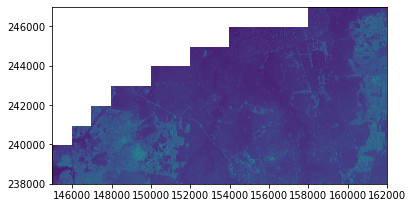

<AxesSubplot:>

In [4]:
# rasterio
fp = r'Data/DSM/DSM-1/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'
DSM_img = rasterio.open(fp)
show(DSM_img)

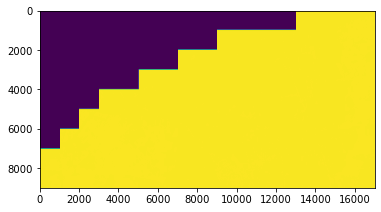

<AxesSubplot:>

In [5]:
show(DSM_img.read())

In [6]:
DSM_img.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 17000,
 'height': 9000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 145000.0,
        0.0, -1.0, 247000.0)}

In [7]:
DSM_img.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [8]:
raster_meta = DSM_img.profile
raster_meta["driver"]

'GTiff'

In [9]:
DSM_img.indexes

(1,)

In [10]:
raster_array = DSM_img.read()
raster_array

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [11]:
raster_array.shape

(1, 9000, 17000)

In [12]:
DSM_img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

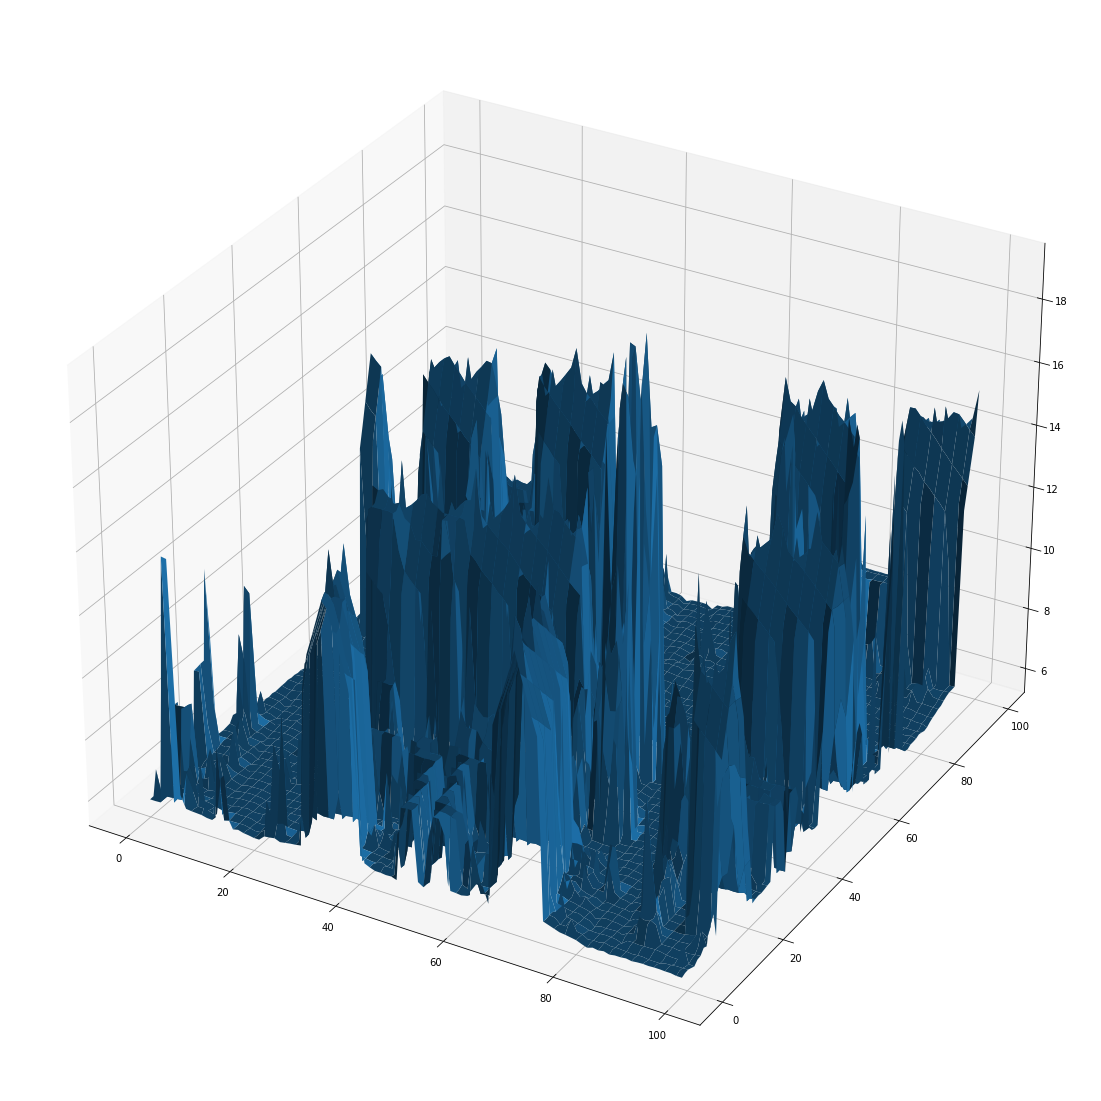

In [13]:
size = 100
rows = DSM_img.height
columns = DSM_img.width

x, y = np.meshgrid(np.array(100), np.array(100))

image = DSM_img.read(1)[1000:1100,11000:11100]
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection='3d')
x = np.outer(np.arange(size),np.ones(size))
y = np.outer(np.ones(size),np.arange(size))  #Try to find another way for x & y since it isn't too efficient.
ax.plot_surface(x,y,image) 
#for x in range(10):
# for y in range(10): 
#ax.plot_surface(x,y,image[x,y]) ax.set_zlim(0,50) plt.show() print(image)

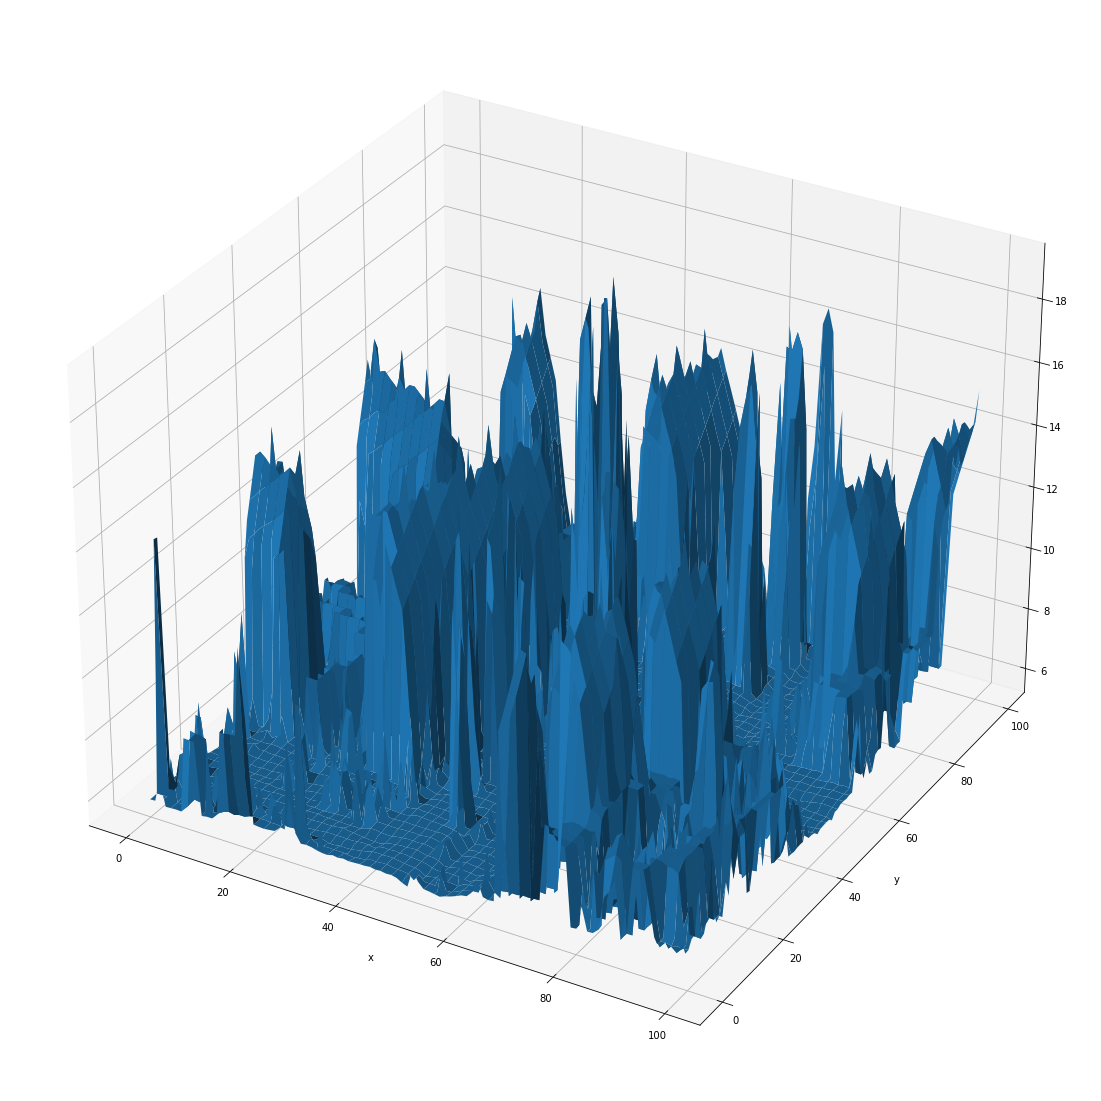

In [14]:
image = DSM_img.read(1)[1000:1100,11000:11100]
nx = image.shape[1]
ny = image.shape[0]

x = range(nx)
y = range(ny)

X,Y = np.meshgrid(x, y)

hf = plt.figure(figsize=(20, 20))
ha = hf.add_subplot(111, projection="3d")
ha.plot_surface(X,Y, image)
ha.set_zlim = (0, 50)
plt.xlabel("x")
plt.ylabel("y")
plt.show()